<a href="https://colab.research.google.com/github/amitpal16181/deepmindAICoursera_codePractice/blob/main/Coursera_C2_W1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ungraded Lab: Using more sophisticated images with Convolutional Neural Networks**
In Course 1 of this specialization, we saw how to use a CNN to make your recognition of computer generated images of horses and humans more efficient. In this lesson, we'll take that to the next level: building a model to classify real images of cats and dogs. Like the horses and humans dataset, real-world images also come in different shapes, aspect ratios, etc. and we will need to take this into account when preparing your data.

In this lab, we will first review how to build CNNs, prepare your data with ImageDataGenerator and examine your results. We'll follow these steps:

Explore the example data of Dogs vs. Cats
Build and train a neural network to classify between the two pets
Evaluate the training and validation accuracy
We will build upon your results here in the next labs so we can improve it, particularly in avoiding overfitting. Let's begin!

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

# **Download and Inspect the Dataset**
We will start by downloading the dataset. This is a .zip of 2,000 JPG pictures of cats and dogs. It is a subset of the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. We will only use 2,000 of the full dataset to decrease training time for educational purposes.

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-25 09:07:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   147MB/s    in 0.4s    

2022-12-25 09:07:41 (147 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



We will then extract it to the current directory.

In [2]:
import zipfile

# Unziping the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

The contents of the .zip are extracted to the base directory `./cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (we can ignore `vectorize.py` in the output in the next cell).

If we recall, the **training set** is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'. The **validation set** is images of cats and dogs that the neural network will not see as part of the training. We can use this to test how well or how badly it does in evaluating if an image contains a cat or a dog. (See the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) if we want a refresher on training, validation, and test sets.)

These subdirectories in turn each contain `cats` and `dogs` subdirectories.

In [4]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Content of base directory:")
print(os.listdir(base_dir))

print("\nContents of training directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Content of base directory:
['vectorize.py', 'validation', 'train']

Contents of training directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


We can assign each of these directories to a variable so we can use it later.

In [5]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training images
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation images
validate_cats_dir = os.path.join(validation_dir, 'cats')
validate_dogs_dir = os.path.join(validation_dir, 'dogs')

Now see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [6]:
train_cat_fname = os.listdir(train_cats_dir)
train_dog_fname = os.listdir(train_dogs_dir)

print(train_cat_fname[:10])
print(train_dog_fname[:10])

['cat.552.jpg', 'cat.791.jpg', 'cat.117.jpg', 'cat.400.jpg', 'cat.247.jpg', 'cat.37.jpg', 'cat.75.jpg', 'cat.440.jpg', 'cat.291.jpg', 'cat.289.jpg']
['dog.174.jpg', 'dog.429.jpg', 'dog.775.jpg', 'dog.128.jpg', 'dog.817.jpg', 'dog.873.jpg', 'dog.752.jpg', 'dog.29.jpg', 'dog.633.jpg', 'dog.879.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [7]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validate_cats_dir)))
print('total validation dog images: ', len(os.listdir(validate_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


For both cats and dogs, you have 1,000 training images and 500 validation images.

Now we will take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplotlib parameters:

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4X4 configuration
nrows = 4
ncols = 4
pic_index = 0    # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can re-run the cell to see a fresh batch each time:

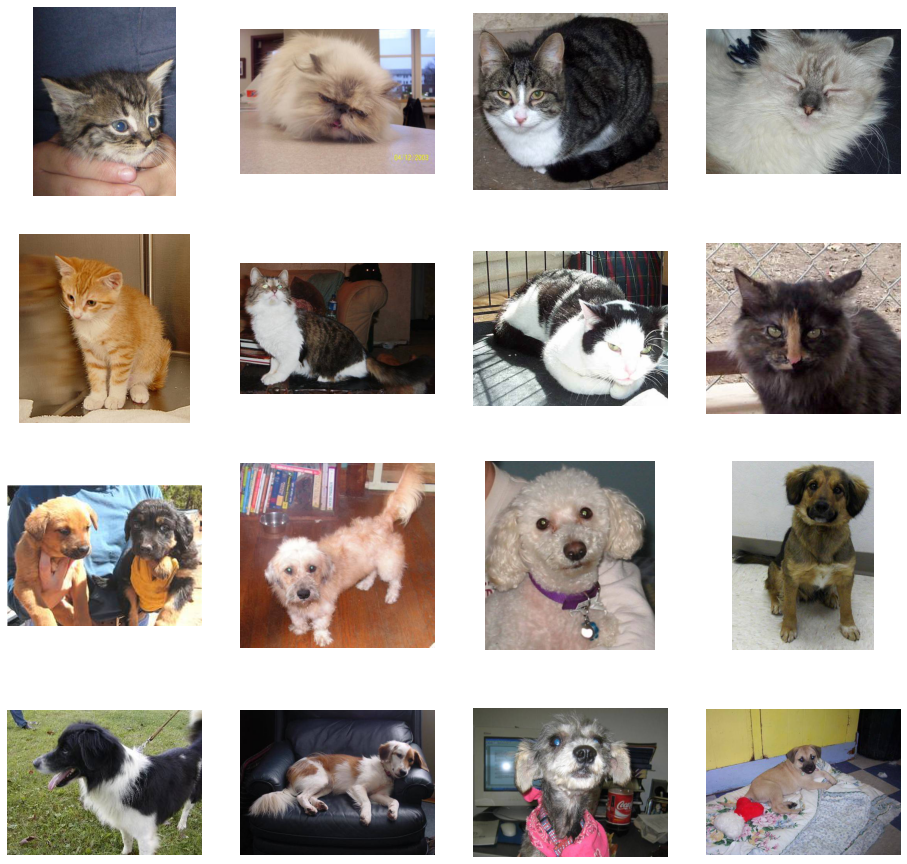

In [9]:
# Setting up matplotlib fig, and size it to fit 4X4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cat_fname[pic_index: pic_index + 8]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fname[pic_index: pic_index + 8]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  # Setting up subplot indices starting from 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')    # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

It may not be obvious from looking at the images in this grid but an important note here is that these images come in all shapes and sizes (just like the 'horses or humans' dataset). So before training a neural network with them, you'll need to tweak the images. You'll see that in the next sections.

# Building a Small Model from Scratch to get to ~72% Accuracy
To train a neural network to handle the images, you'll need them to be in a uniform size. You will choose 150x150 pixels for this, and you'll see the code that preprocesses the images to that shape shortly.

You can define the model by importing Tensorflow and using the Keras API. Here is the entire code first then the discussion comes after. This is very similar to the models you have built in Course 1.

In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Convolutional layers along with max pooling
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flattening the image
    tf.keras.layers.Flatten(),

    # 512 neurons in hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only one output neuron that will show 0/1 for two different classes of output
    tf.keras.layers.Dense(1, activation='sigmoid')
])

We defined a `Sequential` layer as before, adding some convolutional layers first. Note the `input_shape` parameter this time. Here is where you put the `150x150` size and `3` for the color depth because you have colored images. We then add a couple of convolutional layers and flatten the final result to feed into the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a _binary classification problem_, you will end the network with a [sigmoid activation](https://en.wikipedia.org/wiki/Sigmoid_function). The output of the network will be a single scalar between `0` and `1`, encoding the probability that the current image is class `1` (as opposed to class `0`).

We can review the architecture of the network with the `model.summary()` method:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

The `output_shape` column shows how the size of your feature map evolves in each successive layer. The convolution operation removes the outermost pixels from the original dimensions, and each pooling layer halves it.

Next, you'll configure the specifications for model training. You will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and your final activation is a sigmoid. We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, you will want to monitor classification accuracy.

**NOTE:** In this case, using the [RMSprop optimization algorithm](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data Preprocessing
Next step is to set up the data generators that will read pictures in the source folders, convert them to `float32` tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All inputs will be rescaled to 1/255
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,        # ./cats_and_dogs_filtered/train/
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training
We will now train on all 2,000 images available, for 15 epochs, and monitor the accuracy as well on the 1,000 images in the validation set.

Do note the values per epoch.

We'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy.

The loss and accuracy are great indicators of progress in training. loss measures the current model prediction against the known labels, calculating the result. accuracy, on the other hand, is the portion of correct guesses.

In [18]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 45s 440ms/step - loss: 0.7981 - accuracy: 0.5550 - val_loss: 0.7052 - val_accuracy: 0.5070
Epoch 2/15
100/100 [==============================] - 44s 441ms/step - loss: 0.6278 - accuracy: 0.6700 - val_loss: 0.5658 - val_accuracy: 0.7060
Epoch 3/15
100/100 [==============================] - 42s 424ms/step - loss: 0.5487 - accuracy: 0.7405 - val_loss: 0.6981 - val_accuracy: 0.6430
Epoch 4/15
100/100 [==============================] - 42s 418ms/step - loss: 0.4601 - accuracy: 0.7775 - val_loss: 0.6106 - val_accuracy: 0.7000
Epoch 5/15
100/100 [==============================] - 44s 444ms/step - loss: 0.3907 - accuracy: 0.8230 - val_loss: 0.9172 - val_accuracy: 0.6520
Epoch 6/15
100/100 [==============================] - 44s 445ms/step - loss: 0.3027 - accuracy: 0.8695 - val_loss: 0.7215 - val_accuracy: 0.7230
Epoch 7/15
100/100 [==============================] - 46s 457ms/step - loss: 0.2398 - accuracy: 0.8985 - val_loss: 0.8659 - val_ac

# Model Prediction
Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a cat or a dog.

**Important Note:** Due to some compatibility issues, the following code block will result in an error after you select the images(s) to upload if you are running this notebook as a `Colab` on the `Safari` browser. For all other browsers, continue with the next code block and ignore the next one after it.

*For Safari users: please comment out or skip the code block below, uncomment the next code block and run it.*

In [25]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

  if classes[0] > 0.5:
    print(fn + ' is a dog')
  else:
    print(fn + ' is a cat')

Saving doc.jpg to doc.jpg
1/1 [==============================] - 0s 30ms/step
[0.99997085]
doc.jpg is a dog


`Safari` users will need to upload the images(s) manually in their workspace. Please follow the instructions, uncomment the code block below and run it.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a cat or a dog. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below.


In [ ]:
# # CODE BLOCK FOR SAFARI USERS

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(150, 150))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a dog")
#  else:
#    print(i + " is a cat")

# Visualizing Intermediate Representations
To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 102ms/step


<ipython-input-28-fedfb906441f>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


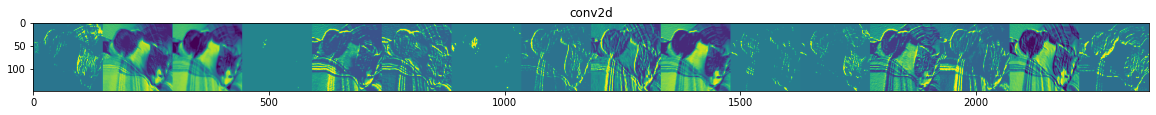

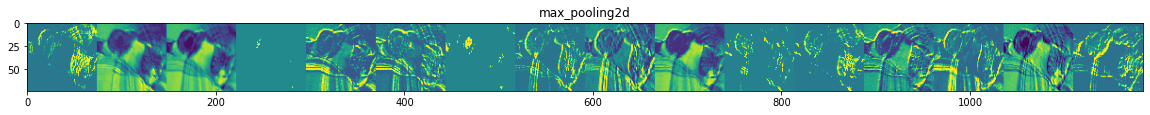

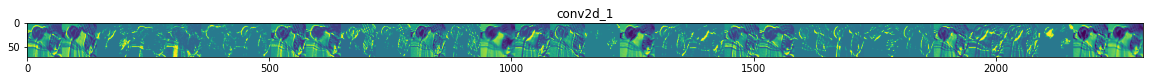

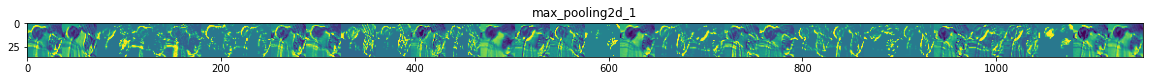

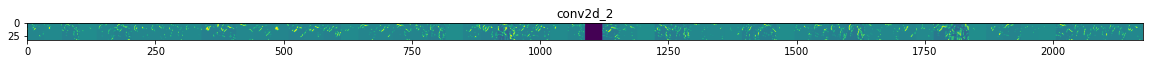

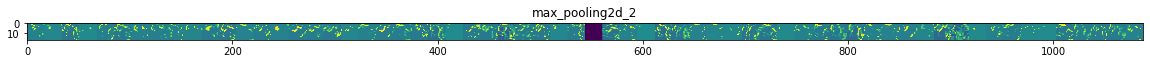

In [28]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Defining a model that take an image as an input and will output intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Preparing a random input image from the training set
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fname]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # This is a PIL image
x = img_to_array(img)                     # NumPy arraywith shape (150, 150, 3)
x = x.reshape((1,) + x.shape)             # NumPy array with shape (1, 150, 150, 3)

# Rescaling to 1/255
x /= 255.0

# Running the image through network, thus obtaining all intermediate representations for image
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  # Number of features in the feature map
    size = feature_map.shape[1]   # Feature map shape (1, size, size, n_features)

    # Tiling the image in a matrix
    display_grid = np.zeros((size, size * n_features))

    # post-processing to make image visually palatable
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x  # Tile each filter into a horizontal grid
    
    # Displaying the grid
    scale = 20. / n_features
    plt.figure(figsize = (scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid.

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called representation sparsity and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

# Evaluating Accuracy and Loss for the Model
You will plot the training/validation accuracy and loss as collected during training:

<Figure size 432x288 with 0 Axes>

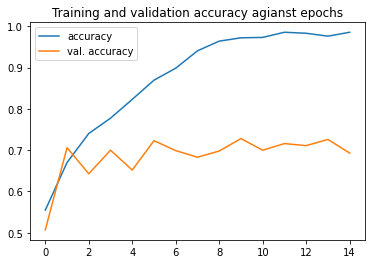

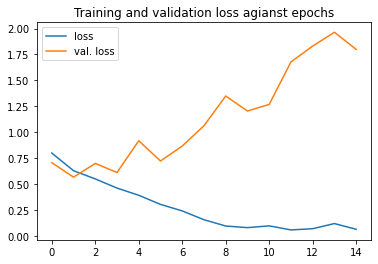

<Figure size 432x288 with 0 Axes>

In [30]:
# Retrieving a list of data from training and testing data for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and visualization accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy agianst epochs')
plt.legend(['accuracy', 'val. accuracy'])
plt.figure()

# Plotting training and visualization loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss agianst epochs')
plt.legend(['loss', 'val. loss'])
plt.figure()

As you can see, the model is **overfitting** like it's getting out of fashion. The training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

Since you have a relatively small number of training examples (2000), overfitting should be the number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that you are fitting the parameters of our model to a given dataset, how can you make sure that the representations learned by the model will be applicable to data it has never seen before? How do you avoid learning things that are specific to the training data?

In the next exercise, you'll look at ways to prevent overfitting in this classification model.

# Clean Up
Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)